The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---xarray package with version 2024.7.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---pymatgen package with version 2024.8.9 is available and imported 
---scipy package with version 1.14.0 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---mp_api package with version 0.42.1 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 


Imported easyxrd with following configuration:



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

CPU times: user 976 ms, sys: 17.2 ms, total: 993 ms
Wall time: 985 ms


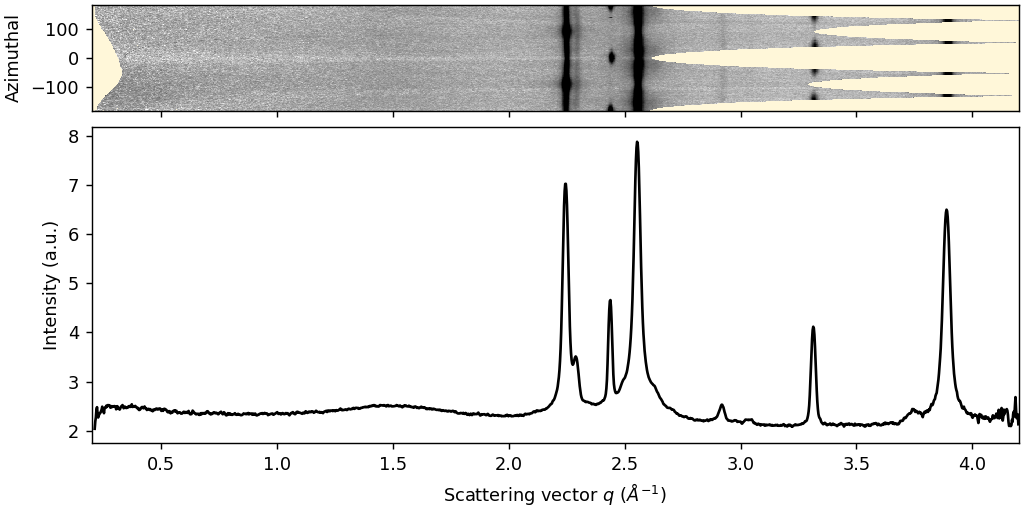

In [88]:
%%time

import pyFAI, fabio

ai_file = "tiff_files/_calibration.poni"
mask_file = "tiff_files/_mask.edf"
ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file="nc_files/Blank.nc", plot=False)


sample_LaB6 = exrd()
# with xr.open_dataset('nc_files/LaB6.nc') as ds:
#     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/LaB6.nc", plot=False)

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file="nc_files/Pt.nc", plot=False)

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file="nc_files/DAHL.nc", plot=False)

sample_Dogbone = exrd(verbose=False)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file="nc_files/Dogbone.nc", plot=True)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.005,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_Pt = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]


phases_Zr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_ZrZrH = [
    {
        "mp_id": "none",
        "cif": "_cifs/ZrH1.66_a=4.7839.cif",
        "label": "ZrH",
        "scale": 0.993,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_PtZr = [
    {
        "mp_id": "none",
        "cif": "_cifs/Pt_a=3.9231.cif",
        "label": "Pt",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/Zr_a=3.2320_c=5.147.cif",
        "label": "Zr",
        "scale": 1,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

In [87]:
sample_Dogbone.ds

<xarray.Dataset> Size: 2MB
Dimensions:        (azimuthal_i2d: 360, radial_i2d: 1600, radial: 1595)
Coordinates:
  * azimuthal_i2d  (azimuthal_i2d) float32 1kB -179.5 -178.5 ... 178.5 179.5
  * radial_i2d     (radial_i2d) float32 6kB 0.2013 0.2037 0.2062 ... 4.196 4.199
  * radial         (radial) float32 6kB 0.2138 0.2163 0.2188 ... 4.196 4.199
Data variables:
    i2d            (azimuthal_i2d, radial_i2d) float32 2MB nan nan ... nan nan
    i1d            (radial) float32 6kB ...

# LaB6

In [5]:
sample_Blank.ds

<xarray.Dataset> Size: 2MB
Dimensions:        (azimuthal_i2d: 360, radial_i2d: 1600, radial: 1595)
Coordinates:
  * azimuthal_i2d  (azimuthal_i2d) float32 1kB -179.5 -178.5 ... 178.5 179.5
  * radial_i2d     (radial_i2d) float32 6kB 0.2013 0.2037 0.2062 ... 4.196 4.199
  * radial         (radial) float32 6kB 0.2138 0.2163 0.2188 ... 4.196 4.199
Data variables:
    i2d            (azimuthal_i2d, radial_i2d) float32 2MB ...
    i1d            (radial) float32 6kB ...


Rwp from 1st refinement is = 71.416 
 
Background is refined. Rwp is now 71.295 (was 71.416)


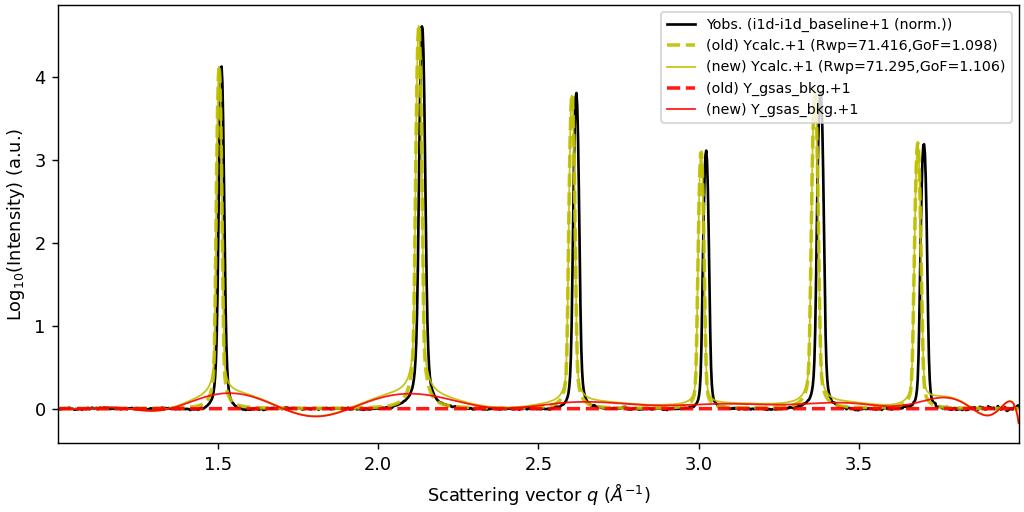

In [227]:
sample = deepcopy(sample_LaB6)

sample.get_baseline(
    input_bkg=sample_Blank,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = True,
    roi_radial_range=[1, 4],
    # roi_azimuthal_range=(0,180),
    normalize=True,
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=False,
)


sample.load_phases(phases=phases_LaB6, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_instprms.gpx")
sample.refine_background(num_coeffs=20,plot=True)
# sample.refine_cell_params(plot=True)
# sample.refine_strain_broadening()
# sample.refine_size_broadening()
# sample.refine_background(num_coeffs=20)
# sample.refine_cell_params(plot=True)

# sample.set_LeBail(set_to=False, refine=True)
# sample.refine_phase_fractions()
# sample.refine_preferred_orientation(phase=0, harmonics_order=4)
# sample.refine_background(num_coeffs=20)
# sample.plot_refinement(ylogscale=True)

In [212]:
sample.gpx_previous

# Pt

In [ ]:
sample = deepcopy(sample_Pt)
sample.get_baseline(
    input_bkg=sample_Blank.ds.i1d,
    arpls_lam=1e5,
    use_arpls=False,
    roi_radial_range=[1.5, 4.2],
    plot=False,
)
sample.load_phases(phases=phases_Pt, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

# DAHL

In [ ]:
sample = deepcopy(sample_DAHL)
sample.get_baseline(
    input_bkg=sample_Blank.ds.i1d,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    normalize_to=100,
    plot=False,
)
sample.load_phases(phases=phases_PtZr, plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()

sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_preferred_orientation(phase=1, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

# Dogbone

In [ ]:
sample = deepcopy(sample_Dogbone)
sample.get_baseline(
    input_bkg=sample_Blank.ds.i1d,
    arpls_lam=1e5,
    use_arpls=True,
    roi_radial_range=[1.5, 4.2],
    normalize_to=100,
    plot=False,
)
sample.load_phases(phases=phases_ZrZrH, plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx="gsas_LaB6.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=1, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)